In [1]:
from s04utils.modules.load.Timestamps import Timestamps
from s04utils.modules.load.BinnedTimestamps import BinnedTimestamps

from s04utils.modules.analyze.dwelltime_analyzer import DwellTimeAnalyzer
from s04utils.modules.analyze.dwelltime_analyzer_v2 import DwelltimeAnalyzer

from matplotlib import pyplot as plt

In [2]:
# set path to data files folder
SOURCE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/23_08_03/77K-6dot6nM-eGFP-vitrified/20uW/timestamps/tt_eGFP_6dot6nm_NaP_100mM_ph7dot5_Treh7dot5_20uW_77K_circpol_012.h5'
#SOURCE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/23_08_07/77K-16nM-eGFP-vitrified/10uW/timestamps/tt_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_018.h5'

In [3]:
timestamps = Timestamps(SOURCE_PATH)

In [4]:
timestamps_binned = BinnedTimestamps(SOURCE_PATH, bin_width=0.01)

In [5]:
comment = timestamps.h5_content['comment'][()].decode('utf-8')
print(comment)

# parse the comment
comment = comment.split('\n')
print(comment)

# strip spaces from the comment
comment = [line.strip() for line in comment]
print(comment)

# create dictionary from comment
# first line is the first key, the rest is the value
comment_dict = {comment[0]: comment[1:]}



print(comment_dict)

cursor position:
  x: 1,366376E-4 m
  y: 1,103154E-4 m
['cursor position:', '  x: 1,366376E-4 m', '  y: 1,103154E-4 m']
['cursor position:', 'x: 1,366376E-4 m', 'y: 1,103154E-4 m']
{'cursor position:': ['x: 1,366376E-4 m', 'y: 1,103154E-4 m']}


In [6]:
analyzer = DwellTimeAnalyzer(timestamps_binned, min_states=2, max_states=2)

Energy detector_0: 920868
Energy detector_1: 1126174


* how many steps found in signal?
* use optimal number of steps or a fixed number of steps?

In [7]:
dwell_times = analyzer.dwell_times

* which detector signal should be used for the steps analysis?
* choose the best detector signal for the steps analysis
* get dwell time from the chosen detector signal

In [8]:
for detector in dwell_times.keys():
    print(detector)
    for state in dwell_times[detector].keys():
        print(state, dwell_times[detector][state])

detector_0
11 [ 488 1787    9]
24 [22  4 68]
detector_1
12 [ 487 1771    8]
37 [22  6 84]
detector_sum
23 [ 488 1786    8]
64 [22  5 69]


* plot the chosen detector signal and the steps found
* plot the chosen detector signal and the steps found with the dwell time

* plot the dwell time histogram

In [9]:
best_detector = analyzer.get_best_detector(timestamps_binned)
print(best_detector)

Energy detector_0: 920868
Energy detector_1: 1126174
detector_1


In [10]:
dta = DwelltimeAnalyzer()

dta.load_data(timestamps_binned)
dta.set_detector('auto')
print(dta.signal)

Detector selection:
-------------------
Energy detector_0:  920868
Energy detector_1:  1126174
detector_1 selected
-------------------
[81 79 72 ... 11  8  8]


In [11]:
dta.set_analysis_method('sfHMM')

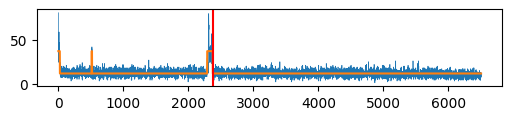

In [12]:
dta.get_last_state_change()

In [13]:
dta.get_opt_num_states()

Optimal number of states:  9


[37.35294039 37.35294039 37.35294039 ... 37.35294039 37.35294039
 37.35294039]


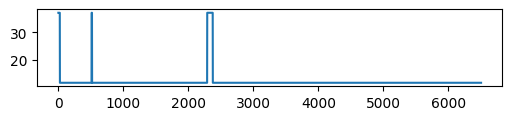

In [14]:
dta.fit_sfHMM()


print(dta.viterbi_path)

plt.figure(figsize=(6, 1))
plt.plot(dta.viterbi_path_fixed)
plt.show()

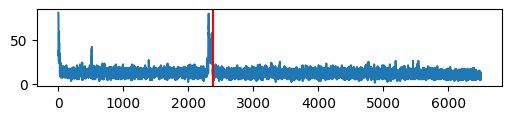

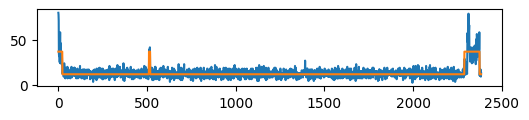

In [15]:
dta.trim_signal()

plt.figure(figsize=(6, 1))
plt.plot(dta.signal)
plt.axvline(x=dta.last_state_change, color='r')
plt.show()

plt.figure(figsize=(6, 1))
plt.plot(dta.signal_trimmed)
plt.plot(dta.viterbi_path_trimmed)
plt.show()

In [16]:
dta.get_dwell_times()

print(dta.dwell_times)

dta.rename_dwell_time_states()

print(dta.dwell_times)

{12: array([ 487, 1771]), 37: array([22,  6, 83])}
{'off': array([ 487, 1771]), 'on': array([22,  6, 83])}


In [17]:
dta.analyze(analysis_method='sfHMM', detector_selection='auto')

Detector selection:
-------------------
Energy detector_0:  920868
Energy detector_1:  1126174
detector_1 selected
-------------------
